## 와인 품질 분석/예측

### 기본 통계

#### 와인 데이터 수집

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

### 와인 데이터 load

#### 기본 패키지 import

In [1]:
import pandas as pd

#### 준비된 와인데이터 load

In [4]:
red_df = pd.read_csv('./data/winequality-red.csv', sep=';')
white_df = pd.read_csv('./data/winequality-white.csv', sep=';')

##### 읽은 데이터 확인

In [5]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [10]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# 데이터프레임의 형태 조회
red_df.shape

(1599, 12)

In [9]:
white_df.shape

(4898, 12)

#### 와인별로 column명으로 type 추가(value로 'red', 'white')

In [11]:
red_df.insert(0, column='type', value='red')
red_df.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
white_df.insert(0, column='type', value='white')
white_df.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


#### red_df, white_df 결합(concat) ---> wine_df

In [13]:
wine_df = pd.concat([red_df, white_df])
wine_df.shape

(6497, 13)

In [14]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
wine_df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


##### wine_df를 csv로 저장

In [16]:
wine_df.to_csv('./data/wine.csv', index=False, encoding='utf-8')

In [17]:
wine = pd.read_csv('./data/wine.csv', encoding='utf-8')
wine.shape

(6497, 13)

In [18]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [24]:
# wine데이터에서 column의 공백을 _로 바꾸기
wine.columns = wine.columns.str.replace(' ', '_')
wine.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine.describe()
# quality는 분류를 하기 위한(등급 매기기) 값이기 때문에 기술통계를 하는 의미가 사실 없음

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [31]:
# wine quality(등급) 어떤 값이 있는지 출력하고 정렬하기(등급 리스트)
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [32]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### 와인 그룹별로 확인

In [33]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [34]:
wine.groupby('type')['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,10.422983,1.065668,8.4,9.5,10.2,11.1,14.9
white,4898.0,10.514267,1.230621,8.0,9.5,10.4,11.4,14.2


### t-검정 / 회귀분석

#### 라이브러리 import

In [35]:
from scipy import stats

In [37]:
# statsmodels 패키지 추가
!pip install statsmodels

##### 회귀분석을 위한 statsmodels 패키지 import

In [38]:
from statsmodels.formula.api import ols, glm

In [39]:
red_wine_quality = wine.loc[wine.type == 'red', 'quality']
red_wine_quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [41]:
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']
white_wine_quality

1599    6
1600    6
1601    6
1602    6
1603    6
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 4898, dtype: int64

In [42]:
# t-검정(두 그룹 사이의 차이를 보기 위한 통계)
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [43]:
# 선형회귀분석
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [46]:
regre_result = ols(Rformula, data=wine).fit() #fit()=예측함수
regre_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:47:46   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
regre_result = glm(Rformula, data=wine).fit()
regre_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                            GLM   Df Residuals:                     6485
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.54071
Method:                          IRLS   Log-Likelihood:                -7215.5
Date:                Fri, 05 Aug 2022   Deviance:                       3506.5
Time:                        12:29:17   Pearson chi2:                 3.51e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.451      79.074
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.756     -31.178
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
========================================================================================
"""

### OLS모델로 계산된 회귀분석 결과로 새 샘플 와인에 대한 품질등급 예측

In [48]:
# quality, type columns은 제거하고 columns을 알파벳순으로 정렬
sample1 = wine[wine.columns.difference(['quality', 'type'])]
sample1 = sample1[0:5][:]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [49]:
# 예측한 quality 등급
sample1_predict = regre_result.predict(sample1) # predict()=예측함수
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [51]:
# 실제 quality 등급
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [52]:
# 가상의 새로운 와인에서 추출된 데이터를 가지고 등급 예측

# fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol
data = {'alcohol':[9.0,0.88], 'chlorides':[0.055,0.04], 'citric_acid':[0.3,0.4], 'density':[0.996,0.91], 'fixed_acidity':[8.5,8.1], 'free_sulfur_dioxide':[30.0,31.0], 'pH':[3.25,3.01], 'residual_sugar':[6.1,5.8], 'sulphates':[0.4,0.35], 'total_sulfur_dioxide':[98.0,99], 'volatile_acidity':[0.8,0.5]}

new_sample = pd.DataFrame(data, columns=sample1.columns)
new_sample


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [53]:
new_sample_predict = regre_result.predict(new_sample)
new_sample_predict

0    4.809094
1    7.582129
dtype: float64

#### 가상의 새 와인 등급 예측 결과로 의사결정

- 1번 = 5등급 -> 75,000원
- 2번 = 8등급 -> 24,000원

### 시각화

#### 와인 유형에 따른 품질등급 히스토그램

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


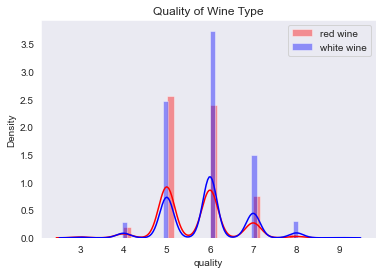

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
sns.distplot(red_wine_quality, kde=True, color='red', label='red wine') 
sns.distplot(white_wine_quality, kde=True, color='blue', label='white wine')
plt.title('Quality of Wine Type')
plt.legend() # 범례 표시
plt.show()

#### 선형회귀 분석값 시각화

In [63]:
# 패키지 import
import statsmodels.api as sm

In [64]:
others = list(set(wine.columns).difference(set(['quality', 'fixed_acidity'])))
others

['residual_sugar',
 'citric_acid',
 'sulphates',
 'density',
 'type',
 'chlorides',
 'alcohol',
 'pH',
 'free_sulfur_dioxide',
 'volatile_acidity',
 'total_sulfur_dioxide']

eval_env: 1


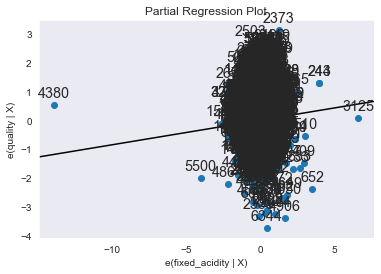

In [66]:
# 독립변수 fixed_acidity(고정산)가 종속변수 quality에 미치는 영향에 대한 부분 회귀 시각화
sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data=wine, ret_coords=True)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


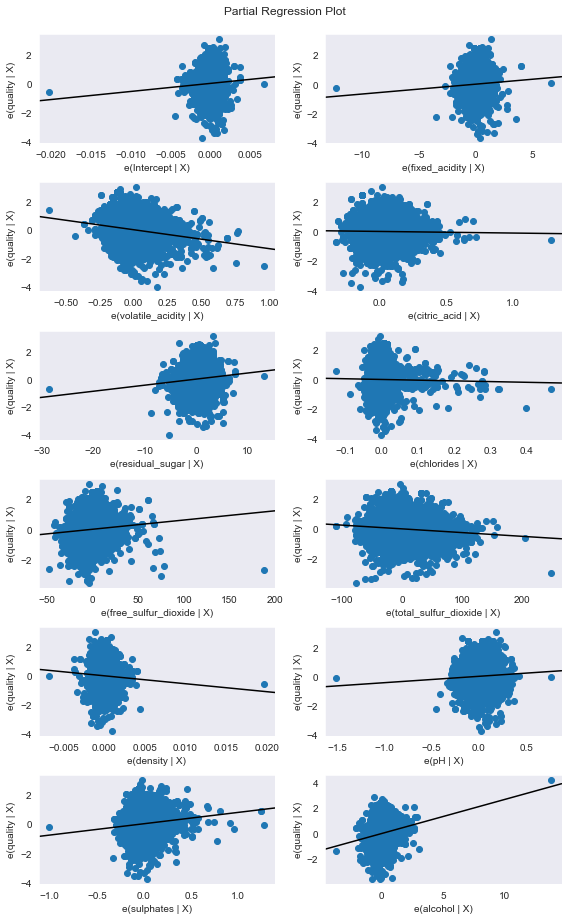

In [67]:
fig = plt.figure(figsize=(8,13))

# 각 독립변수가 종속변수 quality에 미치는 영향에 대한 시각화
sm.graphics.plot_partregress_grid(regre_result, fig=fig) # regre_result=다중회귀분석 결과 데이터
plt.show()